In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#import dataset
dataset = pd.read_csv("Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


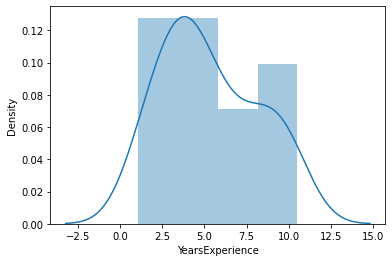

In [8]:
sns.distplot(dataset['YearsExperience'])

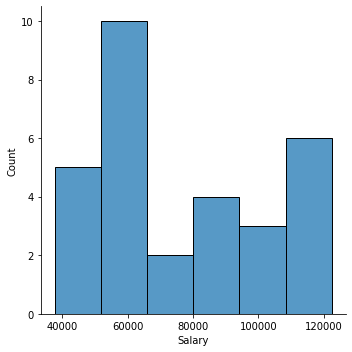

In [9]:
sns.displot(dataset['Salary'])

In [10]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience',data=dataset).fit()

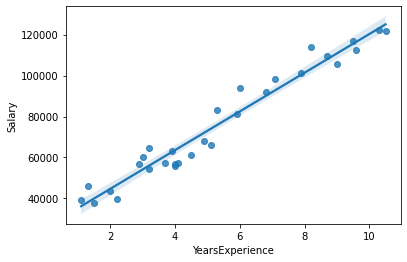

In [11]:
sns.regplot(x="YearsExperience",y="Salary",data=dataset);

In [12]:
#co effients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
#t and p values 
print(model.tvalues, '/n' ,model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 /n Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [14]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [15]:
#predict for say 3 and 5 years experience 
newdata=pd.Series([3,5])

In [16]:
data_pred = pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [17]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64